### Sample tweets for evaluation

In [1]:
import os
import re
import string
import pandas as pd
import numpy as np

In [42]:
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = os.environ.get("DIR_DATA_INTERIM")

In [3]:
FILENAME = "tweets_en_lexicon_sentiments"

In [9]:
tweets_df = pd.read_pickle(os.path.join(DATA_DIR, FILENAME + '.pickle'))

In [10]:
tweets_df.shape

(4166, 12)

### Sampling

Let's sample 150 tweets, a representative sample from each category: pos / neu / neg based on VADER compound score.

Reformat the VDR scores

In [30]:
list_lists_scores = [list(result.values()) if isinstance(result, dict) else result 
                     for result in tweets_df.VDR_sentiment]

In [40]:
tweets_df['VDR_s'] = [float(''.join(map(str, score))) if isinstance(score, list) else score for score in list_lists_scores]

Check distribution of scores

/Users/alessiatosi/DS_projects/behavioural-sci-perception/venv/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/alessiatosi/DS_projects/behavioural-sci-perception/venv/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Count of tweets')

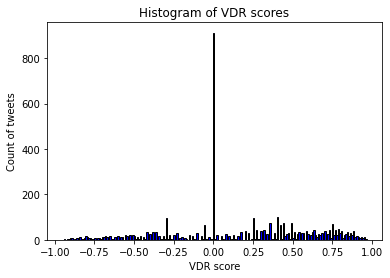

In [47]:
# histogram
plt.hist(list(tweets_df.VDR_s), color='blue', edgecolor = 'black',
         bins = int(1000/5))
# Add labels
plt.title('Histogram of VDR scores')
plt.xlabel('VDR score')
plt.ylabel('Count of tweets')

Propotions of pos/neg/neu scores

In [51]:
# number of positive
tweets_df.VDR_s[tweets_df.VDR_s > 0.0].shape

(2184,)

In [52]:
# number of negative
tweets_df.VDR_s[tweets_df.VDR_s < 0.0].shape

(1068,)

In [54]:
# number of neutral
tweets_df.VDR_s[tweets_df.VDR_s == 0.0].shape

(911,)

In [59]:
prop_pos = round(tweets_df.VDR_s[tweets_df.VDR_s > 0.0].shape[0] / tweets_df.shape[0],2)

In [60]:
prop_neg = round(tweets_df.VDR_s[tweets_df.VDR_s < 0.0].shape[0] / tweets_df.shape[0],2)

In [61]:
prop_neu = round(tweets_df.VDR_s[tweets_df.VDR_s == 0.0].shape[0] / tweets_df.shape[0],2)

In [62]:
print(prop_pos), print(prop_neg), print(prop_neu)

0.52
0.26
0.22


(None, None, None)

### Let's sample 50 pos, 50 neg and 50 neutral

In [65]:
tweets_df['VDR_s_label'] = ['pos' if score < 0.0 else 'neg' if score > 0.0 else 'neu' for score in tweets_df.VDR_s]

In [68]:
sample_tweets_df = tweets_df.groupby('VDR_s_label').apply(lambda x: x.sample(n=50)).reset_index(drop = True)


In [69]:
sample_tweets_df.VDR_s_label.count()

150

### Save data

In [70]:
sample_tweets_df.to_csv(os.path.join(DATA_DIR, "sample_tweets_with_sentiments.csv"))